# Proyek Analisis Data: Bike sharing
- **Nama:** Riana Dwi Rahma
- **Email:** dwirahmariana@gmail.com
- **ID Dicoding:** MC484D5X2102

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda di berbagai musim?
- Bagaimana tren penyewaan sepeda dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
date_df = pd.read_csv("D:/dwi/kuliah/Bike_sharing/day.csv")
date_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
time_df = pd.read_csv("D:/dwi/kuliah/Bike_sharing/day.csv")
time_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Menilai tabel date_df

In [6]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
date_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", date_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
date_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel time_df

In [10]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
time_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [13]:
print("Jumlah duplikasi: ",time_df.duplicated().sum())
time_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Exploratory Data Analysis (EDA)

#### Explore date_df

In [14]:
date_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
378,379,2012-01-14,1,1,1,0,6,0,1,0.180000,0.183087,0.457500,0.187183,333,2160,2493
717,718,2012-12-18,4,1,12,0,2,1,1,0.410833,0.409708,0.666250,0.221404,433,5124,5557
215,216,2011-08-04,3,0,8,0,4,1,2,0.710000,0.664788,0.757500,0.197150,799,3777,4576
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
659,660,2012-10-21,4,1,10,0,0,0,1,0.464167,0.456429,0.510000,0.166054,2132,4692,6824


In [15]:
date_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [17]:
date_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

In [18]:
date_df.groupby(by="yr").instant.nunique().sort_values(ascending=False)

yr
1    366
0    365
Name: instant, dtype: int64

#### Explore time_df

In [19]:
time_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
592,593,2012-08-15,3,1,8,0,3,1,1,0.706667,0.654037,0.619583,0.169771,1198,6149,7347
46,47,2011-02-16,1,0,2,0,3,1,1,0.318261,0.316200,0.423478,0.251791,218,1897,2115
546,547,2012-06-30,3,1,6,0,6,0,1,0.765000,0.687508,0.601250,0.161071,1455,4232,5687
418,419,2012-02-23,1,1,2,0,4,1,1,0.454167,0.444446,0.554583,0.190913,516,4546,5062
154,155,2011-06-04,2,0,6,0,6,0,1,0.635000,0.594696,0.456250,0.123142,1869,3473,5342


In [20]:
time_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


<Axes: >

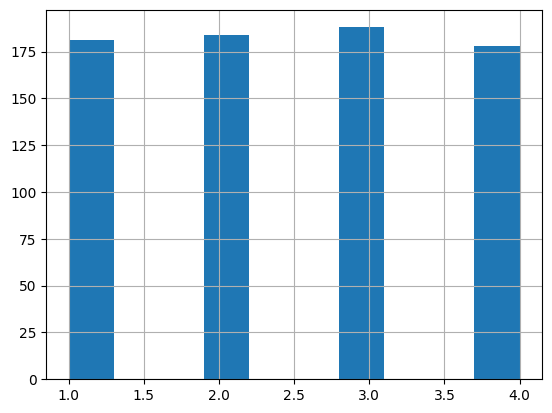

In [21]:
time_df.season.hist()

In [22]:
time_df.groupby("casual").instant.count()

casual
2       1
9       2
15      1
25      1
34      1
       ..
3155    1
3160    1
3252    1
3283    1
3410    1
Name: instant, Length: 606, dtype: int64

## Explore date_df & time_df

#### Menggabungkan data date_df & time_df

In [23]:
date_time_df = pd.merge(
    left=date_df,
    right=time_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
date_time_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
date_time_df.groupby(by="season_x").instant.nunique().sort_values(ascending=False).head(10)

season_x
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

In [26]:
date_time_df.groupby(by="weekday_y").instant.nunique().sort_values(ascending=False).head(10)

weekday_y
0    105
1    105
6    105
2    104
3    104
4    104
5    104
Name: instant, dtype: int64

In [28]:
time_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [38]:
byseason_df = date_df.groupby(by="season").cnt.nunique().reset_index()
byseason_df.rename(columns={
    "cnt": "cnt_day"
}, inplace=True)
byseason_df

,season,cnt_day
0,1,179
1,2,182
2,3,188
3,4,176


## Visualization & Explanatory Analysis

#### Bagaimana pola penyewaan sepeda di berbagai musim?

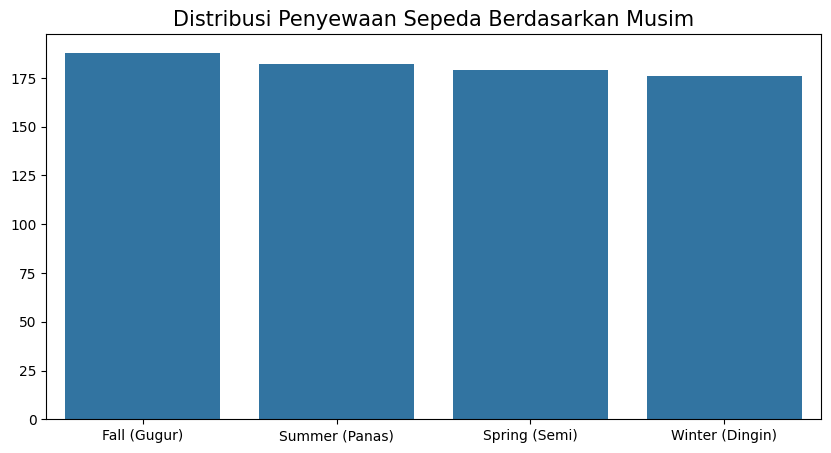

In [54]:
byseason_df = pd.DataFrame({
    'season': [1, 2, 3, 4],
    'cnt_day': [179, 182, 188, 176]
})

# Buat mapping angka ke nama musim
season_mapping = {
    1: 'Spring (Semi)',
    2: 'Summer (Panas)',
    3: 'Fall (Gugur)',
    4: 'Winter (Dingin)'
}

# Ubah angka menjadi nama musim
byseason_df['season'] = byseason_df['season'].map(season_mapping)

# Visualisasi Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(
    y="cnt_day", 
    x="season",
    data=byseason_df.sort_values(by="cnt_day", ascending=False)
)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.show()

In [52]:
bycasual_df = date_df.groupby(by="casual").instant.nunique().reset_index()
bycasual_df.rename(columns={
    "cnt": "cnt_day"
}, inplace=True)
bycasual_df

,casual,instant
0,2,1
1,9,2
2,15,1
3,25,1
4,34,1
...,...,...
601,3155,1
602,3160,1
603,3252,1
604,3283,1


## RFM Analysis

#### Mengurutkan day berdasarkan frequency, monetary & recency

In [63]:
rfm_df = date_df.groupby(by="dteday", as_index=False).agg({
    "cnt": ["max", "nunique", "sum"]
})
rfm_df.columns = ["dteday", "frequency", "monetary", "recency"]
rfm_df.head()

,dteday,frequency,monetary,recency
0,2011-01-01,985,1,985
1,2011-01-02,801,1,801
2,2011-01-03,1349,1,1349
3,2011-01-04,1562,1,1562
4,2011-01-05,1600,1,1600


In [ ]:
date_df['dteday'] = pd.to_datetime(date_df['dteday'])
print(date_df.columns)
rfm_df = date_df.groupby('dteday', as_index=False).agg({
    'cnt': ['max', 'nunique', 'sum']
})
rfm_df.columns = ['dteday', 'frequency', 'monetary', 'recency']
rfm_df['dteday'] = rfm_df['dteday'].dt.date
recent_date = date_df['dteday'].dt.date.max()
rfm_df['recency'] = rfm_df['dteday'].apply(lambda x: (recent_date - x).days)
rfm_df.head()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


,dteday,frequency,monetary,recency
0,2011-01-01,985,1,730
1,2011-01-02,801,1,729
2,2011-01-03,1349,1,728
3,2011-01-04,1562,1,727
4,2011-01-05,1600,1,726


In [66]:
rfm_df.describe()

,frequency,monetary,recency
count,731.000000,731.0,731.000000
mean,4504.348837,1.0,365.000000
std,1937.211452,0.0,211.165812
min,22.000000,1.0,0.000000
25%,3152.000000,1.0,182.500000
50%,4548.000000,1.0,365.000000
75%,5956.000000,1.0,547.500000
max,8714.000000,1.0,730.000000


In [67]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,dteday,frequency,monetary,recency
730,2012-12-31,2729,1,0
729,2012-12-30,1796,1,1
728,2012-12-29,1341,1,2
727,2012-12-28,3095,1,3
726,2012-12-27,2114,1,4


#### Bagaimana tren penyewaan sepeda dari waktu ke waktu?

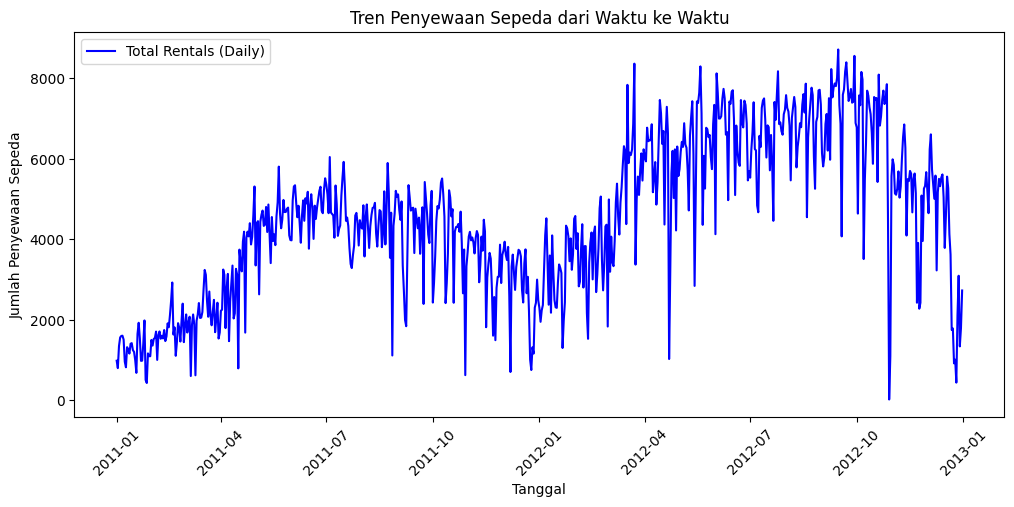

In [71]:
# Misalnya, rentang waktu
start_date = pd.to_datetime("2011-01-01")
end_date = pd.to_datetime("2012-12-31")

# Filter data berdasarkan rentang waktu
df_filtered = date_df[(date_df['dteday'] >= start_date) & (date_df['dteday'] <= end_date)]

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(df_filtered['dteday'], df_filtered['cnt'], label='Total Rentals (Daily)', color='b')

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Penyewaan Sepeda")
ax.set_title("Tren Penyewaan Sepeda dari Waktu ke Waktu")
ax.legend()

plt.xticks(rotation=45)
plt.show()

In [72]:
date_time_df.to_csv("all_data2.csv", index=False)

## Conclusion

1. Bagaimana pola penyewaan sepeda di berbagai musim?
Berdasarkan visualisasi distribusi penyewaan sepeda di berbagai musim:
- Musim Gugur (Fall) memiliki jumlah penyewaan tertinggi di antara semua musim.
- Musim Panas (Summer) dan Musim Semi (Spring) memiliki jumlah penyewaan yang hampir sama dan sedikit lebih rendah dibandingkan Musim Gugur.
- Musim Dingin (Winter) menunjukkan jumlah penyewaan terendah dibandingkan musim lainnya.

2. Bagaimana tren penyewaan sepeda dari waktu ke waktu?
- Tren penyewaan sepeda menunjukkan pertumbuhan signifikan di awal hingga pertengahan periode, dengan puncak di pertengahan 2012.
- Penurunan terjadi menjelang akhir tahun, kemungkinan dipengaruhi oleh perubahan musim atau faktor eksternal lainnya.